# Unsupervised Learning 

The previous examples focused on learning to train models to predict the desired targets for our input data. But what if we don't have targets?

Let's assume we have some dataset with two categories of examples that are **unlabeled**. Could we still train a machine learning model to classify them? The short answer is yes: that's what's called **unsupervised** learning.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

Take a look the following dataset. Could you tell that the data is constructed from 3 different sets of samples?

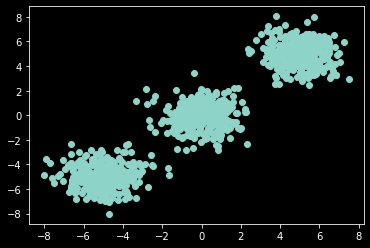

In [2]:
ds_2d = make_blobs(1000, n_features=2, centers=[(-5, -5), (0, 0), (5, 5)])[0]
plt.figure()
plt.scatter(*ds_2d.T)
plt.show()

We don't really need labels to tell us that we are looking at 3 different *clusters* in 2D space. Needles to say, such empirical heuristics like visual inspection may not be so easily applied if we had let's say a 20-dimensional space.

## Density estimation
What your brain is doing automatically when looking at the plot above is called **clustering** based on density estimation. You see there are several areas with more points gathered together and conceptualize those areas as different **clusters**.

Fortunately, density estimation can also be done computationally, so let's take a look a simple method of doing just that: [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

We'll are not going to dive into the math behind it. For know it is enough to know that this method exists and it estimates a density function for our data. It does this by computing a distance metric between every data point in our training sample and every data point in the sample we want to evaluate, making it scale very badly.

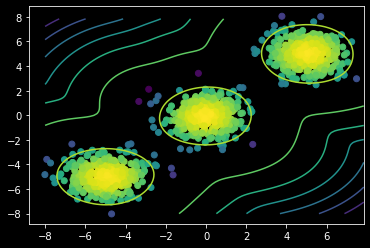

In [3]:
# create and fit a kernel density estimator
kde = KernelDensity().fit(ds_2d)

# define a grid for the contour plot
delta = 0.16
x = np.arange(-8.0, 8.0, delta)
y = np.arange(-8.0, 8.0, delta)
X, Y = np.meshgrid(x, y)

# get the density value for all points on the grid
XY_density = kde.score_samples(np.stack([X.ravel(),Y.ravel()],axis=1))
plt.figure()
plt.contour(X, Y, XY_density.reshape(100,100))
plt.scatter(*ds_2d.T, c=kde.score_samples(ds_2d))
plt.show()

For our small dataset is seems to do a pretty good job. We can use this to score new samples and figure out how likely they are to be part of the same distribution as our training data. But we still haven't done any actual clustering: a point centered in any of the 3 clusters will have roughly the same density value. However, this method may be used to identify if our test data is from the same distribution(s) as our training data.

## K-Means Clustering

This is an actual clustering method, that requires you to know in advance the number of clusters and attempts to separate the data points into that number of categories. It does this by attributing each point to a cluster in such a way that it minimizes the sum of distances between points within every cluster

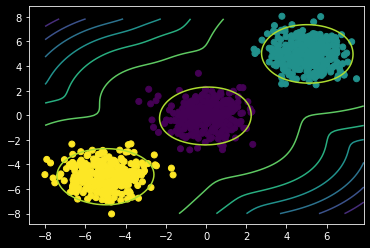

In [4]:
kmeans = KMeans(n_clusters=3).fit(ds_2d)
y_2d = kmeans.predict(ds_2d)

plt.figure()
plt.contour(X, Y, XY_density.reshape(100,100))
plt.scatter(*ds_2d.T, c=y_2d)
plt.show()

## Hands-on exercise

Consider `ds_train` your reference dataset and `ds_test` the sample that needs to be evaluated. Let's take a look at them!

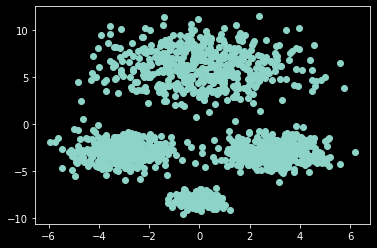

In [5]:
ds_train = make_blobs(
    [400, 500, 400, 200], 
    n_features=2, 
    centers=[(-3, -3), (0, 6), (3, -3), (0, -8)],
    cluster_std=[1, 2, 1, 0.5])[0]
plt.figure()
plt.scatter(*ds_train.T)
plt.show()

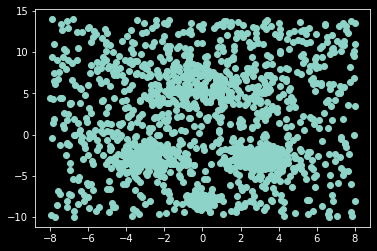

In [6]:
ds_test = make_blobs(
    [200, 250, 200, 100], 
    n_features=2, 
    centers=[(-3, -3), (0, 6), (3, -3), (0, -8)],
    cluster_std=[1, 2, 1, 0.5])[0]
noise = np.stack(
    [
        np.random.uniform(-8,8,750),
        np.random.uniform(-10,14,750)
    ],
    axis=1
)
ds_test = np.concatenate([ds_test, noise], axis=0)

plt.figure()
plt.scatter(*ds_test.T)
plt.show()

Your task is to:
- Use `KDE` to learn the density function of your training dataset
- Use `k-means` to cluster your training dataset
- Assign the test data to the clusters you found
- Bonus: Compute the density values for the test dataset. Create a new category of **outliers** and label all of the points that have low likelihood of being part of the reference dataset based on their density value

In [7]:
raise NotImplementedError

NotImplementedError: 